# Examples of How to Use Deterministic Models in Eir

This file will show how to use the Deterministic models within Eir and the different features they contain

In [1]:
from Eir import SIR, SIRV # the two sample models that will be used for demonstration
import numpy as np
import pandas as pd

The first thing that should be done is initialize the key parameters of each model. Below, the SIR model's parameters will be initialized. You can find the parameters your specific deterministic model takes in the docs folder.



In [7]:
beta = 1.2 # beta parameter in the differential equation important for S -> I compartment transfer. Represents effective transmission rate
gamma = .15 # gamma parameter in the differential equation. Represents recovery rate
S0 = 99999 # the starting number of susceptible individuals in the simulation
I0 = 1 # the starting number of infectious individuals in the simulation
R0 = 0 # the starting number of recovered individuals, NOT the basic reproduction number

sim = SIR(beta=beta, gamma=gamma, S0=S0, I0=I0, R0=R0) # create the SIR object with the parameters that were declared

For a run, decide how many days you want to be simulated, as well as the step-size you want to use for the Euler's Method. In order to solve the ODEs, Euler's method is used for a good approximation. The greater the step-size, the less computationally expensive the Euler's method is. However, the graph will be less precise. 

Afterwards, use the run() method to run a simulation. This method always returns a pandas dataframe first, but can also return a fig pyplot object, controlled by the plot variable. By default, plot=True as a parameter, along with different boolean values to control which variables are plotted. These variables change with each model, so refer to documentation to be sure which boolean variables can be changed. 

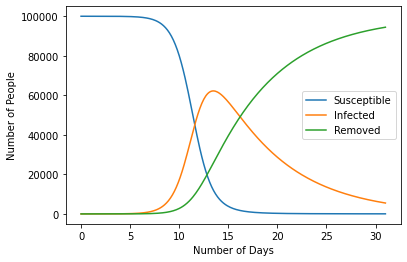

In [8]:
days, dt = 31, .1 # the number of days simulated and step-size, respectively
df, fig = sim.run(days=days, dt=dt) # run the simulation and return the dataframe and plot with all of the variables

In [9]:
df # print the dataframe

,Days,Susceptible,Infected,Removed
0,0.0,99999.000000,1.000000,0.000000
1,0.1,99998.880001,1.104999,0.015000
2,0.2,99998.747403,1.221022,0.031575
3,0.3,99998.600882,1.349228,0.049890
4,0.4,99998.438977,1.490894,0.070129
...,...,...,...,...
306,30.6,44.563400,5852.915513,94102.521087
307,30.7,44.250409,5765.434771,94190.314820
308,30.8,43.944261,5679.259397,94276.796342
309,30.9,43.644776,5594.369991,94361.985233


The following is a plot with just the number of infected individuals

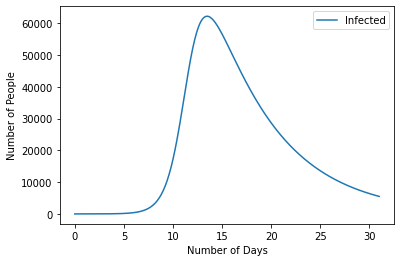

<AxesSubplot:xlabel='Number of Days', ylabel='Number of People'>

In [18]:
df2, fig2 = sim.run(days=days, dt=dt, Sbool=False, Rbool=False)
fig2

If you would like the run to be such that the accumulated cases are accounted for, not just active cases, then the accumulate function will do that for you.

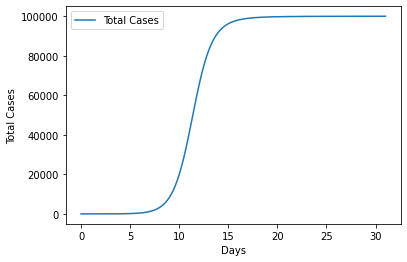

In [13]:
df_accumulate = sim.accumulate(days=days, dt=dt) # Accumulate only returns a pandas dataframe. Accumulate doesn't return a Fig object, it only displays the plot if plot=True

In [14]:
df_accumulate # view the pandas dataframe

,Days,Susceptible,Infected,Removed,Total Cases
0,0.0,99999.000000,1.000000,0.000000,1.000000
1,0.1,99998.880001,1.104999,0.015000,1.119999
2,0.2,99998.747403,1.221022,0.031575,1.252597
3,0.3,99998.600882,1.349228,0.049890,1.399118
4,0.4,99998.438977,1.490894,0.070129,1.561023
...,...,...,...,...,...
306,30.6,44.563400,5852.915513,94102.521087,99955.436600
307,30.7,44.250409,5765.434771,94190.314820,99955.749591
308,30.8,43.944261,5679.259397,94276.796342,99956.055739
309,30.9,43.644776,5594.369991,94361.985233,99956.355224


The total cases can be seen in the "Total Cases" column of the pandas dataframe.

Additionally, if a normalized run is what is desired, then the normalizedRun() function will divide by the size of the population, normalizing the data. 

In [19]:
df_normal = sim.normalizeRun(days=days, dt=dt, accumulate=False) # if accumulate=True, then it will add an accumulate column to the dataframe and normalize the accumulated run
df_normal # view the dataframe of normalized run. Important to note that no plots are shown nor returned with this function

,Days,Susceptible,Infected,Removed
0,0.0,0.999990,0.000010,0.000000e+00
1,0.1,0.999989,0.000011,1.500000e-07
2,0.2,0.999987,0.000012,3.157498e-07
3,0.3,0.999986,0.000013,4.989031e-07
4,0.4,0.999984,0.000015,7.012873e-07
...,...,...,...,...
306,30.6,0.000446,0.058529,9.410252e-01
307,30.7,0.000443,0.057654,9.419031e-01
308,30.8,0.000439,0.056793,9.427680e-01
309,30.9,0.000436,0.055944,9.436199e-01


In [16]:
df_accumulate_normal = sim.normalizeRun(days=days, dt=dt) # the accumulate variable is True by default
df_accumulate_normal

,Days,Susceptible,Infected,Removed,Total Cases
0,0.0,0.999990,0.000010,0.000000e+00,0.000010
1,0.1,0.999989,0.000011,1.500000e-07,0.000011
2,0.2,0.999987,0.000012,3.157498e-07,0.000013
3,0.3,0.999986,0.000013,4.989031e-07,0.000014
4,0.4,0.999984,0.000015,7.012873e-07,0.000016
...,...,...,...,...,...
306,30.6,0.000446,0.058529,9.410252e-01,0.999554
307,30.7,0.000443,0.057654,9.419031e-01,0.999557
308,30.8,0.000439,0.056793,9.427680e-01,0.999561
309,30.9,0.000436,0.055944,9.436199e-01,0.999564
